<a href="https://colab.research.google.com/github/Vicodethrone/Tour-de-Py/blob/main/Day_14_l%C3%A0m_tr%C3%ACnh_ph%C3%A1t_nh%E1%BA%A1c_c%C3%B3_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trình phát nhạc mp3 player bằng python tại sao không ?

Chúng ta sẽ tạo một trình phát nhạc mp3 trong đó có thể phát bài hát, tạm dừng, tiếp tục và điều hướng từ bài hát hiện tại sang bài hát tiếp theo cũng như các bài hát trước đó.

Chúng ta sẽ sử dụng Python và các thư viện của nó. Thư viện đầu tiên mà chúng ta sẽ sử dụng là Tkinter, đây là thư viện GUI được sử dụng rộng rãi do python cung cấp, chúng ta không phải cài đặt riêng vì nó đi kèm với chính python.

Tiếp theo, chúng ta sẽ sử dụng module Pygame để tạo trò chơi điện tử, nó bao gồm các thư viện đồ họa và âm thanh máy tính. Mixer là một trong những thư viện âm thanh như vậy. Sau đó, chúng ta sẽ sử dụng thư viện os của python để tương tác với Hệ điều hành.

Không giống như tkinter, Pygame phải cài đặt : bạn chỉ cần ghi cú pháp pip install pygame ở terminal là xong

# Các bước để phát triển phần mềm

1. Import các thư viện quan trọng
2. Tạo layout
3. Khởi tạo hàm play, pause, và các hàm khác

# 1. Import các thư viện quan trọng



In [ ]:
#importing libraries 
from pygame import mixer
from tkinter import *
import tkinter.font as font
from tkinter import filedialog #class filedialog của thư viện tkinter giúp mở file, directory

# 2. Tạo layout chung



In [ ]:
#creating the root window 
root=Tk()
root.title('DataFlair Python MP3 Music player App ')
#initialize mixer so that we can use it’s various functions in our application.
mixer.init()

#create the listbox to contain songs
songs_list=Listbox(root,selectmode=SINGLE,bg="black",fg="white",font=('arial',15),height=12,width=47,selectbackground="gray",selectforeground="black")
songs_list.grid(columnspan=9)

#font is defined which is to be used for the button font 
defined_font = font.Font(family='Helvetica')

#play button
play_button=Button(root,text="Play",width =7,command=Play)
play_button['font']=defined_font
play_button.grid(row=1,column=0)

#pause button 
pause_button=Button(root,text="Pause",width =7,command=Pause)
pause_button['font']=defined_font
pause_button.grid(row=1,column=1)

#stop button
stop_button=Button(root,text="Stop",width =7,command=Stop)
stop_button['font']=defined_font
stop_button.grid(row=1,column=2)

#resume button
Resume_button=Button(root,text="Resume",width =7,command=Resume)
Resume_button['font']=defined_font
Resume_button.grid(row=1,column=3)

#previous button
previous_button=Button(root,text="Prev",width =7,command=Previous)
previous_button['font']=defined_font
previous_button.grid(row=1,column=4)

#nextbutton
next_button=Button(root,text="Next",width =7,command=Next)
next_button['font']=defined_font
next_button.grid(row=1,column=5)

#menu 
my_menu=Menu(root)
root.config(menu=my_menu)
add_song_menu=Menu(my_menu)
my_menu.add_cascade(label="Menu",menu=add_song_menu)
add_song_menu.add_command(label="Add songs",command=addsongs)
add_song_menu.add_command(label="Delete song",command=deletesong)


mainloop()

# 3. Khởi tạo các hàm chức năng

* addongs () được sử dụng để thêm các bài hát vào hộp danh sách của chúng tôi. Sau đó, chúng ta có thể chọn các bài hát và lưu trữ chúng trong biến temp_song, sau đó chúng ta lặp qua danh sách để chèn mọi mục trong hộp danh sách.

* deletesong () được sử dụng để xóa một bài hát đã chọn, hàm songs_list.curselection () trả về một bộ giá trị trong đó phần tử đầu tiên là chỉ mục của bài hát đã chọn. Sau đó, hàm .delete () được sử dụng để xóa bài hát tương ứng với chỉ mục được chuyển qua.

* Hàm Play () được sử dụng để phát bài hát đã chọn, chúng ta sử dụng phương thức .get () để lấy bài hát đã chọn, sau đó chúng ta tải bài hát và phát bằng hai dòng tiếp theo.

* Hàm Pause () dùng để tạm dừng bài hát, chúng ta không cần truyền bất kỳ đối số nào cho hàm mixer.music.pause ().

* Hàm Stop () dùng để dừng bài hát, chúng ta sử dụng hàm mixer.music.stop () để dừng bài hát.
Songs_list.selection_clear (ACTIVE) được sử dụng để bỏ chọn bài hát đã chọn từ hộp danh sách

* Hàm Resume () được sử dụng để tiếp tục bài hát bằng cách sử dụng hàm mixer.music.unpause ().

* Hàm before () được sử dụng để phát bài hát trước đó trong hộp danh sách, hàm songs_list.curselection () trả về một bộ giá trị trong đó phần tử đầu tiên là chỉ mục của bài hát đã chọn trong dự án trình phát nhạc python mp3. Chúng tôi lưu trữ nó trong một biến có tên là before_one, sau đó chúng tôi cập nhật giá trị của nó để lấy chỉ số trước đó bằng cách trừ đi 1. Tiếp theo, songs_list.get (before_one) trả về bài hát trước đó, chúng tôi lưu trữ giá trị này trong temp2 sau đó chúng tôi tải bài hát này và phát nó.
Chúng ta sẽ gặp phải một vấn đề ở đây, mặc dù bài hát trước đó sẽ bắt đầu phát nhưng bài hát đã chọn sẽ không thay đổi. Vì vậy, chúng tôi khắc phục điều đó với sự trợ giúp của ba dòng mã tiếp theo.

* Hàm Next () được thực hiện theo cách tương tự như hàm trước đó. Ở đây, thay vì trừ 1, chúng ta cộng 1 ngoài bước này, mọi bước khác đều giống nhau.

In [ ]:
#add many songs to the playlist of python mp3 player
def addsongs():
    #to open a file  
    temp_song=filedialog.askopenfilenames(initialdir="Music/",title="Choose a song", filetypes=(("mp3 Files","*.mp3"),))
    ##loop through every item in the list to insert in the listbox
for s in temp_song:
        s=s.replace("C:/Users/DataFlair/python-mp3-music-player/","") #NOTICE YOUR SATISFIED LOCATION
songs_list.insert(END,s)
     
def deletesong():
    curr_song=songs_list.curselection()
    songs_list.delete(curr_song[0])
    
    
def Play():
    song=songs_list.get(ACTIVE)
    song=f'C:/Users/lenovo/Desktop/DataFlair/Notepad/Music/{song}' #NOTICE YOUR SATISFIED LOCATION
    mixer.music.load(song)
    mixer.music.play()

#to pause the song 
def Pause():
    mixer.music.pause()

#to stop the  song 
def Stop():
    mixer.music.stop()
    songs_list.selection_clear(ACTIVE)

#to resume the song

def Resume():
    mixer.music.unpause()

#Function to navigate from the current song
def Previous():
    #to get the selected song index
    previous_one=songs_list.curselection()
    #to get the previous song index
    previous_one=previous_one[0]-1
    #to get the previous song
    temp2=songs_list.get(previous_one)
                   temp2=f'C:/Users/DataFlair/python-mp3-music-player/{temp2}' #NOTICE YOUR SATISFIED LOCATION
    mixer.music.load(temp2)
    mixer.music.play()
    songs_list.selection_clear(0,END)
    #activate new song
    songs_list.activate(previous_one)
    #set the next song
    songs_list.selection_set(previous_one)

def Next():
    #to get the selected song index
    next_one=songs_list.curselection()
    #to get the next song index
    next_one=next_one[0]+1
    #to get the next song 
    temp=songs_list.get(next_one)
            temp=f'C:/Users/DataFlair/python-mp3-music-player/{temp}' #NOTICE YOUR SATISFIED LOCATION
    mixer.music.load(temp)
    mixer.music.play()
    songs_list.selection_clear(0,END)
    #activate newsong
    songs_list.activate(next_one)
     #set the next song
    songs_list.selection_set(next_one)

# Output

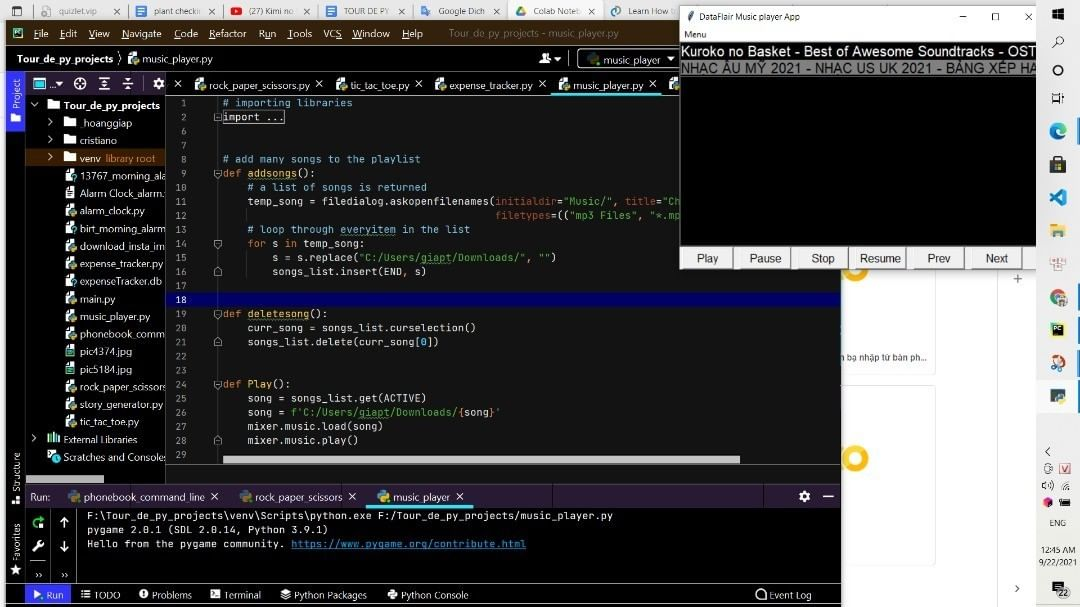

# Tóm gọn

Thông qua dự án python này, chúng ta đã học được rất nhiều thư viện Tkinter làm quen vô số widget và là mixer module của thư viện pygame được sử dụng để thao tác trên bản nhạc.

Nguồn: [data-flair.training](https://data-flair.training/blogs/python-mp3-player/)